In [1]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
from numpy import inf
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from scipy import stats

In [7]:
file_1 = pd.read_csv('/Users/rona/Dropbox/Rona_DPhil/Corrections for paper/IQ trees/branch_length_scatter.csv')
print(file_1.columns)

Index(['branch_length', 'node', ' chloroplast  gain ', ' chloroplast  lost ',
       ' mitochondria  gain ', ' mitochondria  lost ', ' secretory  gain ',
       ' secretory  lost ', ' peroxisome  gain ', ' peroxisome  lost ',
       'Lineage'],
      dtype='object')


In [29]:
def log_scatter(file_1):
    fig, axes = plt.subplots(2, 4, sharey=True, sharex=True, figsize=(15,7))

    # y-axis in bold
    rc('font', weight='bold')
    font = {'size'   : 12}
    rc('font', **font)

    titles = ['Chloroplast', 'Mitochondrion', 'Secretory', 'Peroxisome']
    headings = []
    for heading in file_1.columns:
        if 'gain' in heading:
            headings.append(heading)
    for heading in file_1.columns:
        if 'lost' in heading:
            headings.append(heading)

    count = 0
    for i in range(2):
        for j in range(4):
            x = np.log10(file_1['branch_length'])
            y = np.log10(file_1[headings[count]])
            axes[i, j].plot(x, y, '.')

            y[y == -inf] = 0

            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

            b, m = polyfit(x, y, 1)
            axes[i, j].plot(x, b + m * x, '-')

            if count < 4:
                axes[i, j].set_title(titles[count])
            count += 1

    axes[0,0].set_ylabel("$\mathregular{log_{10}}$(no. gains)")
    axes[1,0].set_ylabel("$\mathregular{log_{10}}$(no. losses)")
    fig.text(0.5, 0.04, 'Molecular sequence evolution (substitution rate) $\mathregular{log_{10}}$', ha='center')

    fig.savefig("/Users/rona/Dropbox/Rona_DPhil/Corrections for paper/IQ trees/scatterplot_branch_length_log10.pdf", bbox_inches='tight')        


/Users/rona/miniconda3/envs/paper01_figures/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


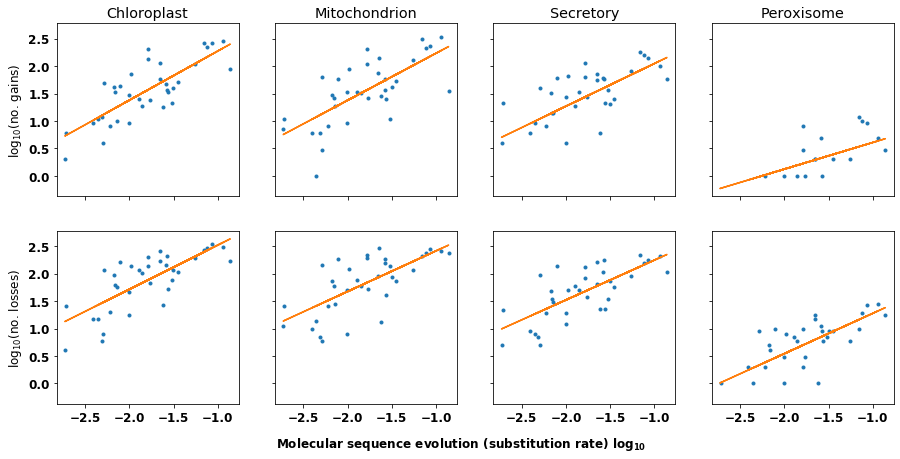

In [30]:
log_scatter(file_1)

In [13]:
def scatter(file_1):
    fig, axes = plt.subplots(2, 4, sharey=True, sharex=True, figsize=(15,7))

    # y-axis in bold
    rc('font', weight='bold')
    font = {'size'   : 12}
    rc('font', **font)

    titles = ['Chloroplast', 'Mitochondrion', 'Secretory', 'Peroxisome']
    headings = []
    for heading in file_1.columns:
        if 'gain' in heading:
            headings.append(heading)
    for heading in file_1.columns:
        if 'lost' in heading:
            headings.append(heading)

    count = 0
    for i in range(2):
        for j in range(4):
            x = file_1['branch_length']
            y = file_1[headings[count]]
            axes[i, j].plot(x, y, '.')

            y[y == -inf] = 0

            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            print(headings[count])
            print(r_value)
            print(p_value)
            b, m = polyfit(x, y, 1)
            axes[i, j].plot(x, b + m * x, '-')

            if count < 4:
                axes[i, j].set_title(titles[count])
            count += 1

    axes[0,0].set_ylabel("no. gains")
    axes[1,0].set_ylabel("no. losses")
    fig.text(0.5, 0.04, 'Molecular sequence evolution (substitution rate)', ha='center')

    fig.savefig("/Users/rona/Dropbox/Rona_DPhil/Corrections for paper/IQ trees/scatterplot_branch_length.pdf", bbox_inches='tight')        


/Users/rona/miniconda3/envs/paper01_figures/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 chloroplast  gain 
0.7044971924319958
2.3189319467075804e-06
 mitochondria  gain 
0.6344767714616532
4.255616868528272e-05
 secretory  gain 
0.6240040455522593
6.189815657452584e-05
 peroxisome  gain 
0.6103309207342965
9.896289656958217e-05
 chloroplast  lost 
0.6915721590768006
4.214250059194288e-06
 mitochondria  lost 
0.6640934672480163
1.3634238499005959e-05
 secretory  lost 
0.6472677617377414
2.6419471746117995e-05
 peroxisome  lost 
0.7737943542871413
5.0004330369481345e-08


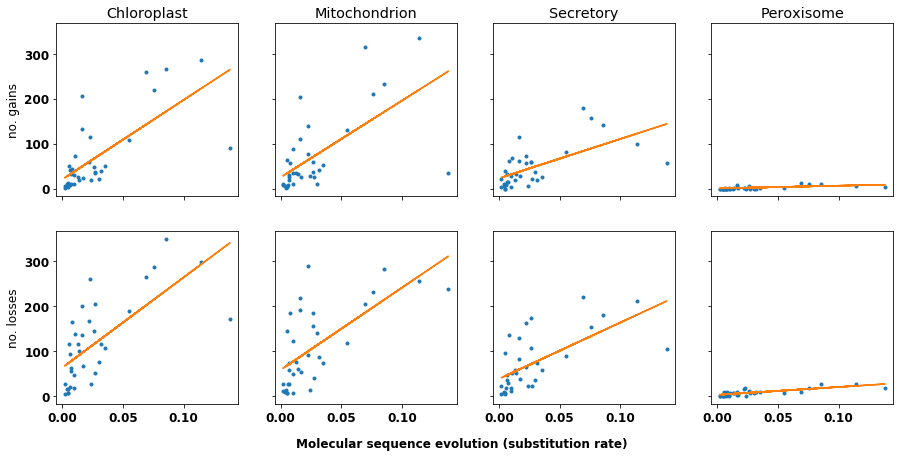

In [16]:
scatter(file_1)

/Users/rona/miniconda3/envs/paper01_figures/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


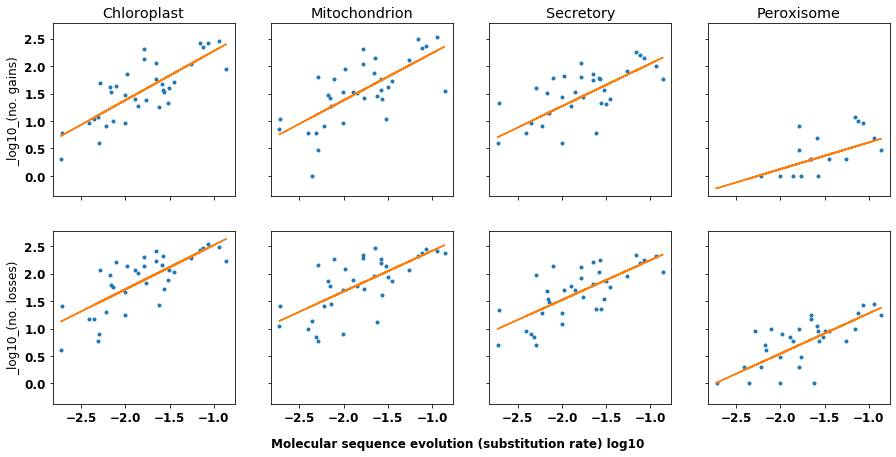

In [17]:
log_scatter(file_1)